# Speech Emotion Recognition

## 1.Basic data husbandry and exploration

### Input dataset: RAVDESS

The RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song) dataset has been used for this project. This dataset has 7356 files rated by 247 individuals 10 times on emotional validity, intensity, and genuineness. The entire dataset is 24.8GB from 24 actors, but we’ve lowered the sample rate on all the files.

The accompanying metadata contains a unique file nameID for each sound along .

A sample of this dataset can be downloaded from [here](https://drive.google.com/file/d/1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7/view).

In [1]:
# Audio file processing libraries
import librosa                       #The librosa is a Python package for music and audio processing as a numpy array for analysis and manipulation.
import soundfile

# Data processing libraries
import numpy as np
import pandas as pd
import os, glob, pickle
from scipy import signal

# UI rendering libraries
import seaborn as sns
import librosa.display
import IPython.display as ipd          # This allows us to play audio directly in the Jupyter Notebook. 
import matplotlib.pyplot as plt

### Extracting metadata and target classes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Data Directory
dir_list = os.listdir('/content/drive/MyDrive/speech_dataset/')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


#### Reading data

In [10]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('/content/drive/MyDrive/speech_dataset/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = '/content/drive/MyDrive/speech_dataset/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [11]:
print (len(data_df))
data_df.head()

1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,1
1,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,1,1
2,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,0,1
3,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,1,1
4,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,2


### Auditory inspection : Plotting the audio file's waveform and its spectrogram

Using `IPython.display.Audio` to play the audio files so we can inspect aurally.

In [13]:
ipd.Audio('/content/drive/MyDrive/speech_dataset/Actor_01/03-01-01-01-01-01-01.wav')

### Visual inspection

A sample from each class is loaded and inspected visually for any patterns.

In [16]:
    
def visualInspectAudio(filename, window_size=20, step_size=10, eps=1e-10):    
                  
  data, sample_rate = librosa.load(filename)
  
  nperseg = int(round(window_size * sample_rate / 1e3))
  noverlap = int(round(step_size * sample_rate / 1e3))
  
  freqs, times, spec = signal.spectrogram(data, fs=sample_rate, window='hann', nperseg=nperseg, noverlap=noverlap, detrend=False)
  spec = np.log(spec.T.astype(np.float32) + eps)
  
#     mean = np.mean(spec, axis=0)
#     std = np.std(spec, axis=0)
#     spec = (spec - mean) / std
  
#     print("Mean: ", mean, "Standard deviation: ", std, "Spectogram: ", spec)

  fig = plt.figure(figsize=(12,8))

  ax1 = fig.add_subplot(211)
  ax1.set_title('Raw wave of ' + filename)
  ax1.set_ylabel('Amplitude')
  librosa.display.waveplot(data, sr=sample_rate)
  
  

  ax2 = fig.add_subplot(212)
  ax2.imshow(spec.T, aspect='auto', origin='lower', 
              extent=[times.min(), times.max(), freqs.min(), freqs.max()])
  ax2.set_yticks(freqs[::16])
  ax2.set_xticks(times[::16])
  ax2.set_title('Spectrogram of ' + filename)
  ax2.set_ylabel('Freqs in Hz')
  ax2.set_xlabel('Seconds')

  
  return ipd.Audio(filename)
    

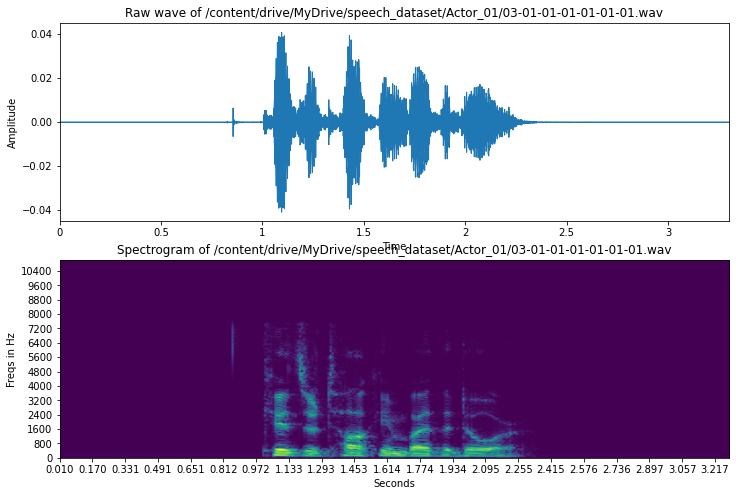

In [17]:
# Class: Neutral emotion : Male
filename = '/content/drive/MyDrive/speech_dataset/Actor_01/03-01-01-01-01-01-01.wav'
visualInspectAudio(filename)

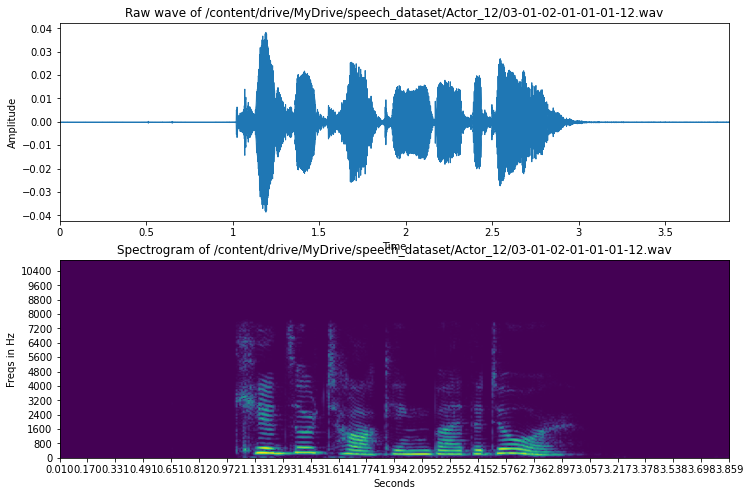

In [19]:
# Class: Calm emotion : Female
filename = '/content/drive/MyDrive/speech_dataset/Actor_12/03-01-02-01-01-01-12.wav'
visualInspectAudio(filename)

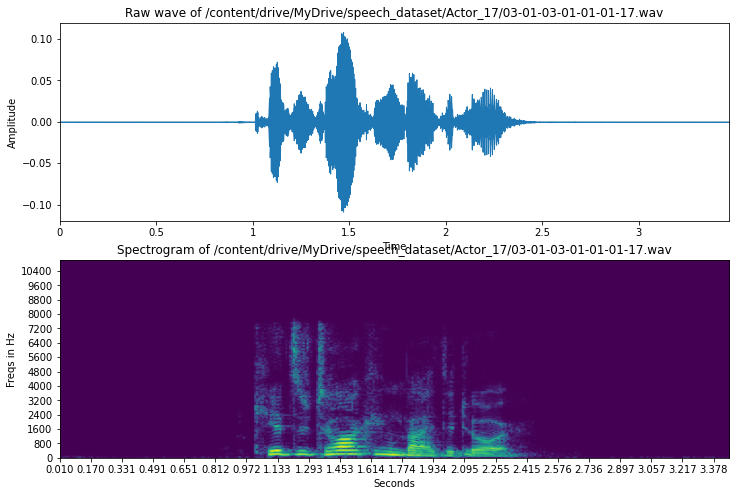

In [20]:
# Class: Happy emotion : Male
filename = '/content/drive/MyDrive/speech_dataset/Actor_17/03-01-03-01-01-01-17.wav'
visualInspectAudio(filename)

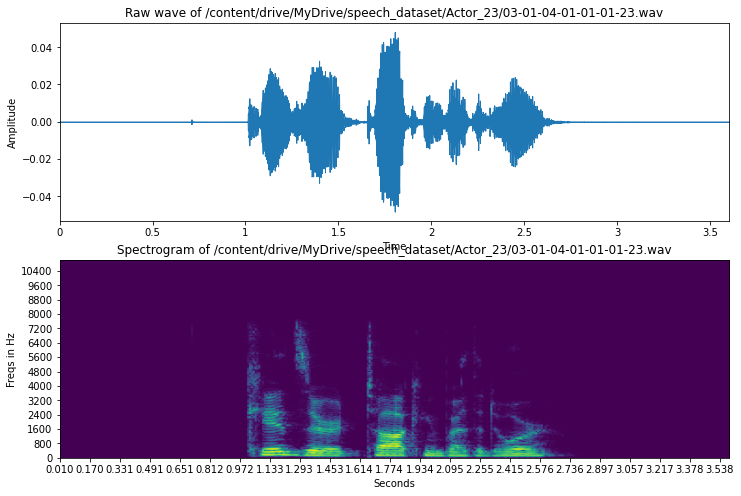

In [21]:
# Class: Sad emotion : Male
filename = '/content/drive/MyDrive/speech_dataset/Actor_23/03-01-04-01-01-01-23.wav'
visualInspectAudio(filename)

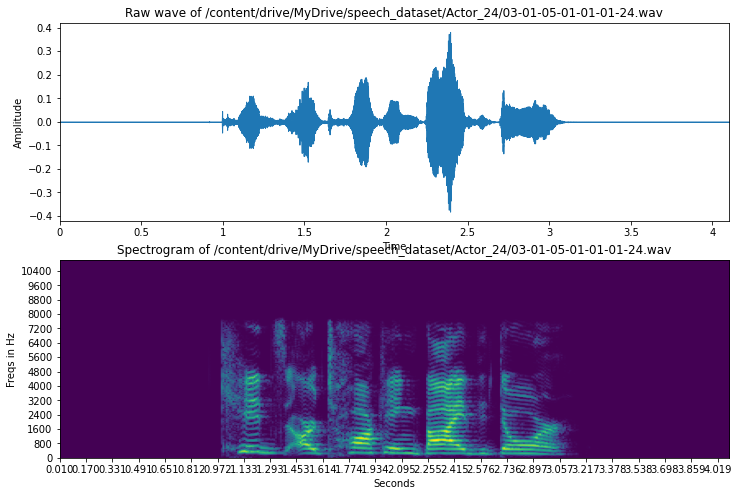

In [22]:
# Class: Angry emotion : Femake
filename = '/content/drive/MyDrive/speech_dataset/Actor_24/03-01-05-01-01-01-24.wav'
visualInspectAudio(filename)

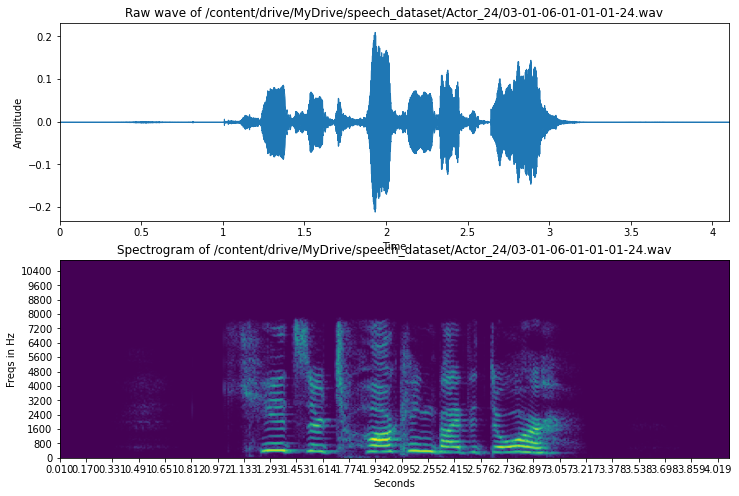

In [23]:
# Class: Fearful emotion : Female
filename = '/content/drive/MyDrive/speech_dataset/Actor_24/03-01-06-01-01-01-24.wav'
visualInspectAudio(filename)

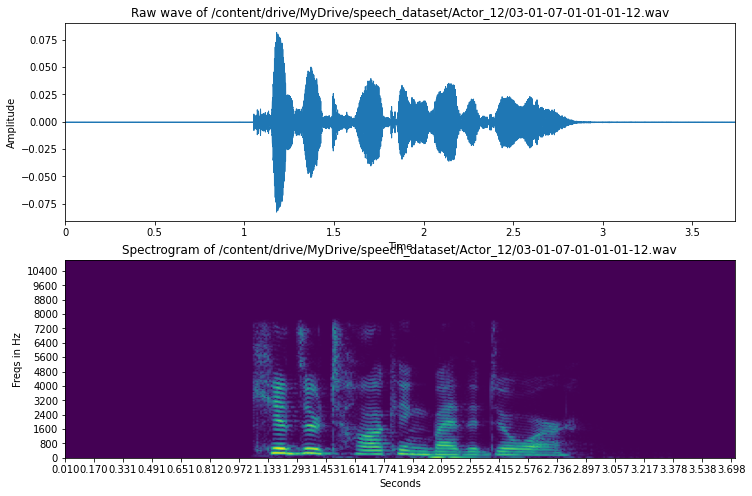

In [24]:
# Class: Disgust emotion : Female
filename = '/content/drive/MyDrive/speech_dataset/Actor_12/03-01-07-01-01-01-12.wav'
visualInspectAudio(filename)

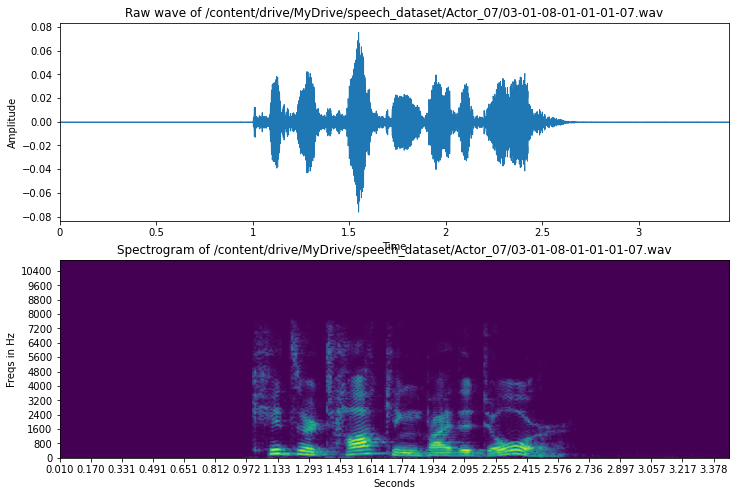

In [25]:
# Class: Surprised emotion : Male
filename = '/content/drive/MyDrive/speech_dataset/Actor_07/03-01-08-01-01-01-07.wav'
visualInspectAudio(filename)

#### Exploring the class targets

In [26]:
def plotEmotionBarChart(data, color_code='#C3245B', title="Plot"):

    tmp = pd.DataFrame()
    tmp['Emotion'] = list(data.keys())
    
    tmp['Count'] = list(data)
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ax = sns.barplot(data=tmp, x="Emotion", y='Count', color=color_code)
    ax.set_title(title)
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [27]:
# Partition emotions into 2 classes: Positive & Negative
# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad,

emotion_label = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        label = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        label = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        label = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        label = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        label = "_negative"
    else:
        label = "_none"
        
    # Add gender to the label    
    emotion_label.append(data_df.gender[i] + label)
    
len(emotion_label)

1440

In [28]:
data_df['label'] = emotion_label
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,1,male_none
1,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,1,1,male_none
2,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,0,1,male_none
3,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,1,1,male_none
4,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,2,male_positive


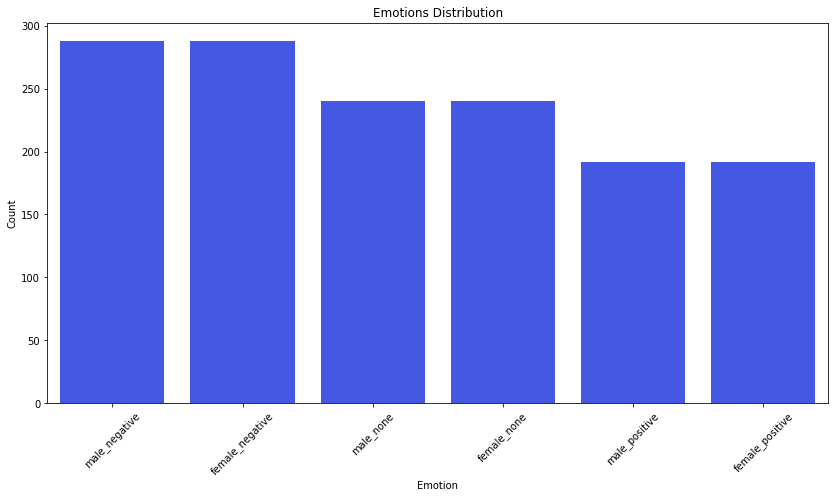

In [29]:
emotions = data_df.label.value_counts()
plotEmotionBarChart(emotions, "#2944FF", "Emotions Distribution")

In [30]:
# Partition emotions into 3 classes: Positive, Negative & Neutral
# Positive: Calm, Happy, Surprised
# Negative: Angry, Fearful, Sad, Disgust

all_emotion_labels = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        label = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        label = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        label = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        label = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        label = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        label = "_negative"
    elif data_df.emotion[i] == 7: # Disgust
        label = "_negative"
    elif data_df.emotion[i] == 8: # Surprised
        label = "_positive"
    else:
        label = "_none"
    
    # Add gender to the label  
    all_emotion_labels.append(data_df.gender[i] + label)
    
len(all_emotion_labels)

1440

In [31]:
data_df['label'] = all_emotion_labels
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,1,male_neutral
1,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,1,1,male_neutral
2,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,0,1,male_neutral
3,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,1,1,male_neutral
4,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,2,male_neutral


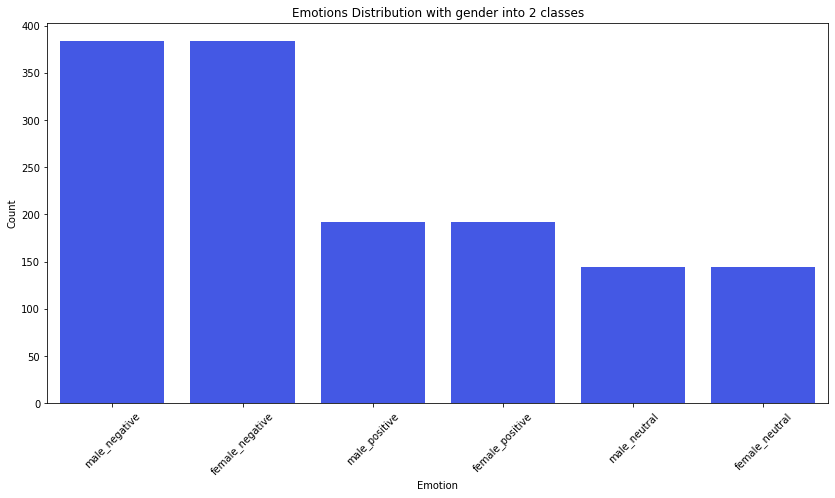

In [32]:
emotions = data_df.label.value_counts()
plotEmotionBarChart(emotions, "#2944FF", "Emotions Distribution with gender into 2 classes")

In [33]:
# 5 classes: angry, calm, sad, happy & fearful
five_emotions = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        label = "_calm"
    elif data_df.emotion[i] == 3:
        label = "_happy"
    elif data_df.emotion[i] == 4:
        label = "_sad"
    elif data_df.emotion[i] == 5:
        label = "_angry"
    elif data_df.emotion[i] == 6:
        label = "_fearful"    
    else:
        label = "_none"
    
    # Add gender to the label  
    five_emotions.append(data_df.gender[i] + label)
    
len(five_emotions)

1440

In [34]:
data_df['label'] = five_emotions
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,1,male_none
1,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,1,1,male_none
2,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,0,1,male_none
3,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,1,1,male_none
4,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,2,male_calm


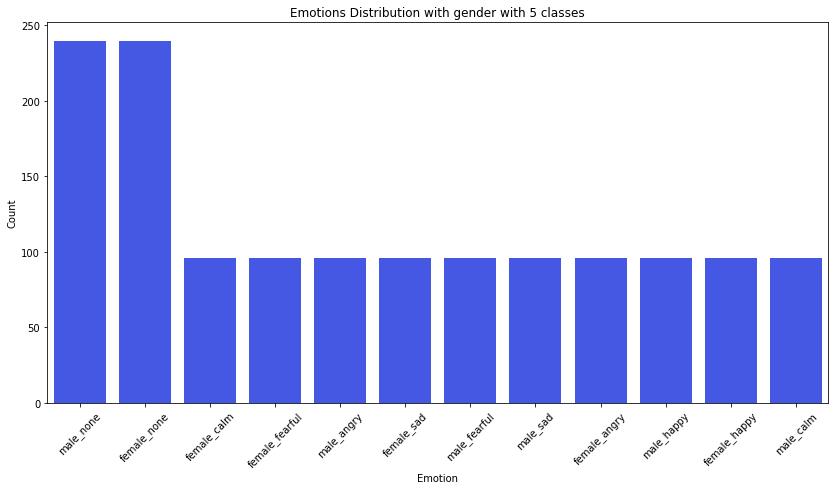

In [35]:
emotions = data_df.label.value_counts()
plotEmotionBarChart(emotions, "#2944FF", "Emotions Distribution with gender with 5 classes")

In [36]:
# All class with gender

all_emotions = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        label = "_neutral"
    elif data_df.emotion[i] == 2:
        label = "_calm"
    elif data_df.emotion[i] == 3:
        label = "_happy"
    elif data_df.emotion[i] == 4:
        label = "_sad"
    elif data_df.emotion[i] == 5:
        label = "_angry"
    elif data_df.emotion[i] == 6:
        label = "_fearful"
    elif data_df.emotion[i] == 7:
        label = "_disgust"
    elif data_df.emotion[i] == 8:
        label = "_surprised"
    else:
        label = "_none"
        
    # Add gender to the label 
    all_emotions.append(data_df.gender[i]  + label)
    
len(all_emotions)
data_df['label'] = all_emotions
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,1,male_neutral
1,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,1,1,male_neutral
2,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,0,1,male_neutral
3,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,1,1,male_neutral
4,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,2,male_calm


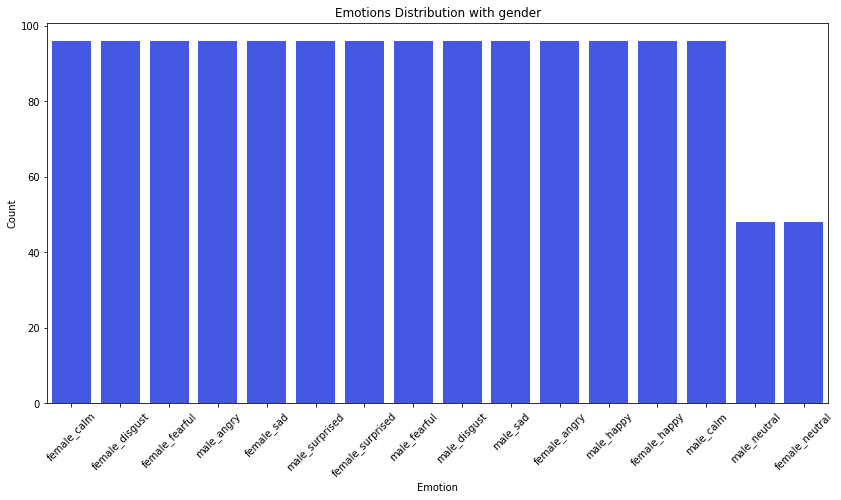

In [37]:
emotions = data_df.label.value_counts()
plotEmotionBarChart(emotions, "#2944FF", "Emotions Distribution with gender")

In [38]:
# All class without gender
all_emotions = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        label = "neutral"
    elif data_df.emotion[i] == 2:
        label = "calm"
    elif data_df.emotion[i] == 3:
        label = "happy"
    elif data_df.emotion[i] == 4:
        label = "sad"
    elif data_df.emotion[i] == 5:
        label = "angry"
    elif data_df.emotion[i] == 6:
        label = "fearful"
    elif data_df.emotion[i] == 7:
        label = "disgust"
    elif data_df.emotion[i] == 8:
        label = "surprised"
    else:
        label = "none"
        
    # Add gender to the label 
    all_emotions.append(label)
    
len(all_emotions)
data_df['label'] = all_emotions
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,1,neutral
1,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,1,1,neutral
2,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,0,1,neutral
3,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,1,1,1,neutral
4,/content/drive/MyDrive/speech_dataset/Actor_01...,1,1,male,0,0,0,2,calm


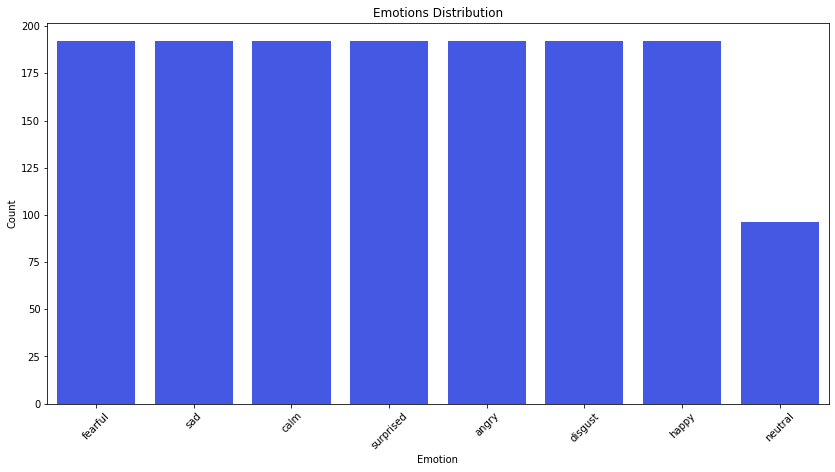

In [39]:
emotions = data_df.label.value_counts()
plotEmotionBarChart(emotions, "#2944FF", "Emotions Distribution")

### Observations 


From a visual inspection it can be tricky to differentiate between some of the classes. 

Particularly, the waveforms for reptitive sounds for sad, neutral and calm are similar in shape.  

Likewise the peak in fearful emotion sample is similar in shape to the surprised emotion sample . Also, the car horn is similar too. 

The human ear can naturally detect the difference between the harmonics, it will be interesting to see how well a deep learning model will be able to extract the necessary features to distinguish between these classes. 

However, it is easy to differentiate from the waveform shape, the difference between certain classes such as angry and calm emotions. 

## 2. Extracting audio features using librosa

In [3]:
max_pad_len = 174

# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, padding=False):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    # X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      if padding:
        mfccs=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)

        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

        result= mfccs

      else:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        #print(mfccs.shape)
        result=np.hstack((result, mfccs))

    if chroma:
      if padding:
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)

        pad_width = max_pad_len - chroma.shape[1]
        chroma = np.pad(chroma, pad_width=((0, 0), (0, pad_width)), mode='constant')

        result=np.vstack((result, chroma))

      else:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        #print(chroma.shape)
        result=np.hstack((result, chroma))

    if mel:
      if padding:
        mel = librosa.feature.melspectrogram(X, sr=sample_rate)

        pad_width = max_pad_len - mel.shape[1]
        mel = np.pad(mel, pad_width=((0, 0), (0, pad_width)), mode='constant')

        result=np.vstack((result, mel))
      else:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #print(mel.shape)
        result=np.hstack((result, mel))
  return result


In [4]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

# Emotions to observe
observed_emotions=['calm', 'happy', 'disgust', 'angry', 'fearful']

In [5]:
# Load the data and extract features for each sound file
yy=[]
features_cnn = []
def load_data(test_size=0.2):
  x=[]
  for file in glob.glob("/content/drive/MyDrive/speech_dataset/Actor_*/*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
      continue
    feature=extract_feature(file, mfcc=True, chroma=False, mel=False)
    x.append(feature)
    yy.append(emotion)  
    features_cnn.append([feature, emotion])
  return train_test_split(np.array(x), yy, test_size=test_size, random_state=9)

## 3. Machine Learning

### a. Using MLP Classifier
In order to recognize/classify the emotion/tone of speech in an audio file by a machine, we begin with using MLPClassifier.
The following libraries have been used for MLP and audio file IO.
This is a Multi-layer Perceptron Classifier which optimizes the log-loss function using LBFGS or stochastic gradient descent. Unlike SVM or Naive Bayes, the MLPClassifier has an internal neural network for the purpose of classification. This is a feedforward ANN model.

In [70]:
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [71]:
# Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [72]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(768, 192)


In [73]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 40


In [74]:
# Initialize the Multi Layer Perceptron Classifier
model = MLPClassifier(alpha=0.1, batch_size=256, epsilon=5e-08, hidden_layer_sizes=(300,),
                    learning_rate='adaptive', learning_rate_init=1e-04, max_iter=10000)

In [75]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=5e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.0001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [76]:
# Predict for the test set
y_pred = model.predict(x_test)

In [77]:
# Calculate the accuracy of our model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.48%


### b. Using CNN

In [78]:
import keras
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from datetime import datetime 

In [79]:
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features_cnn, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  960  files


In [80]:
# Convert features and corresponding classification labels into numpy arrays
X_cnn = np.array(featuresdf.feature.tolist())
y_cnn = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le_cnn = LabelEncoder()
yy_cnn = to_categorical(le_cnn.fit_transform(y_cnn))

#### Split the dataset
Here we will use sklearn.model_selection.train_test_split to split the dataset into training and testing sets. The testing set size will be 20% and we will set a random state.

In [81]:
# split the dataset 
xc_train, xc_test, yc_train, yc_test = train_test_split(X_cnn, yy_cnn, test_size=0.2, random_state = 42)

In [82]:
num_labels = yy_cnn.shape[1]
filter_size = 2

# Construct model 
model_cnn = Sequential()

model_cnn.add(Dense(256, input_shape=(x_train.shape[1], )))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.1))

model_cnn.add(Dense(256))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.1))

model_cnn.add(Dense(256))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.1))

model_cnn.add(Dense(num_labels))
model_cnn.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0000005, momentum=0.0, decay=0.0, nesterov=False)

In [83]:
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [84]:
model_cnn.summary()

# Calculate pre-training accuracy 
score = model_cnn.evaluate(xc_test, yc_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [ ]:
num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1,
                               save_best_only=True,
                               monitor='val_loss',
                               mode='min')
start = datetime.now()

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.00000007)

model_cnn.fit(xc_train,
          yc_train,
          batch_size=num_batch_size,
          epochs=num_epochs,
          validation_data=(xc_test, yc_test),
          callbacks=[checkpointer, lr_reduce],
           verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


In [86]:
# Evaluating the model on the training and testing set
score_cnn = model_cnn.evaluate(xc_train, yc_train, verbose=0)
print("Training Accuracy: ", score_cnn[1])

score_cnn = model_cnn.evaluate(xc_test, yc_test, verbose=0)
print("Testing Accuracy: ", score_cnn[1])

Training Accuracy:  1.0
Testing Accuracy:  0.859375


In [87]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name, mfcc=True, chroma=False, mel=False) 
    
    prediction_feature = prediction_feature.reshape(1, xc_train.shape[1])
    
    predicted_vector = model_cnn.predict_classes(prediction_feature)
    predicted_class = le_cnn.inverse_transform(predicted_vector) 
    
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model_cnn.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    
    for i in range(len(predicted_proba)): 
        category = le_cnn.inverse_transform(np.array([i]))
        print(category[0], ": ", format(predicted_proba[i], '5.3f') )

In [88]:
#'03':'happy',
filename = "/content/drive/MyDrive/speech_dataset/Actor_01/03-01-03-01-01-01-01.wav"
print_prediction(filename)

The predicted class is: happy 

angry :  0.000
calm :  0.000
disgust :  0.000
fearful :  0.000
happy :  1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [90]:
#'02':'calm',
filename = "/content/drive/MyDrive/speech_dataset/Actor_01/03-01-02-02-01-01-01.wav"
print_prediction(filename)

The predicted class is: calm 

angry :  0.000
calm :  1.000
disgust :  0.000
fearful :  0.000
happy :  0.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [91]:
#  '08':'surprised',
filename = "/content/drive/MyDrive/speech_dataset/Actor_24/03-01-08-02-02-01-24.wav"
print_prediction(filename)

The predicted class is: fearful 

angry :  0.000
calm :  0.000
disgust :  0.182
fearful :  0.818
happy :  0.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [92]:
#'04':'sad'
filename = "/content/drive/MyDrive/speech_dataset/Actor_13/03-01-04-01-02-02-13.wav"
print_prediction(filename)

The predicted class is: disgust 

angry :  0.000
calm :  0.140
disgust :  0.859
fearful :  0.000
happy :  0.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


### c. Using 2D-CNN with padding

In [25]:
import numpy as np

from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  

from datetime import datetime 

In [26]:
yy_pad=[]

def load_data(test_size=0.2):
  x=[]
  features_cnn_pad = []
  for file in glob.glob("/content/drive/MyDrive/speech_dataset/Actor_*/*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
        continue

    feature=extract_feature(file, mfcc=True, chroma=False, mel=False, padding=True)
    x.append(feature)

    yy.append(emotion)
    features_cnn_pad.append([feature, emotion])

  featuresdf = pd.DataFrame(features_cnn_pad, columns=['feature','class_label'])
  print('Finished feature extraction from ', len(featuresdf), ' files')

  return featuresdf
    
featuresdf_cp = load_data()


Finished feature extraction from  960  files


In [27]:
featuresdf_cp.shape

(960, 2)

#### Split the dataset
Here we will use sklearn.model_selection.train_test_split to split the dataset into training and testing sets. The testing set size will be 20% and we will set a random state.

In [28]:
# Convert features and corresponding classification labels into numpy arrays
X_cp = np.array(featuresdf_cp.feature.tolist())
y_cp = np.array(featuresdf_cp.class_label.tolist())

# Encode the classification labels
le_cp = LabelEncoder()
yy_cp = to_categorical(le_cp.fit_transform(y_cp)) 

# split the dataset 
xcp_train, xcp_test, ycp_train, ycp_test = train_test_split(X_cp, yy_cp, test_size=0.2, random_state = 42)

In [30]:
num_rows = X_cp.shape[1]
num_columns = X_cp.shape[2]
num_channels = 1

xcp_train = xcp_train.reshape(xcp_train.shape[0], num_rows, num_columns, num_channels)
xcp_test = xcp_test.reshape(xcp_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy_cp.shape[1]
filter_size = 2

# Construct model 
model_cp = Sequential()

model_cp.add(Conv2D(filters=256, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model_cp.add(Conv2D(filters=256, kernel_size=2))
model_cp.add(BatchNormalization())
model_cp.add(Activation('relu'))
model_cp.add(Dropout(0.25))
model_cp.add(MaxPooling2D(pool_size=2))


model_cp.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model_cp.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model_cp.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model_cp.add(Conv2D(filters=128, kernel_size=2))
model_cp.add(BatchNormalization())
model_cp.add(Activation('relu'))
model_cp.add(Dropout(0.25))
model_cp.add(MaxPooling2D(pool_size=2))

model_cp.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_cp.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_cp.add(GlobalAveragePooling2D())

model_cp.add(Dense(num_labels, activation='softmax'))


In [31]:
# Compile the model
model_cp.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [32]:
# Display model architecture summary 
model_cp.summary()

# Calculate pre-training accuracy 
score_cp = model_cp.evaluate(xcp_test, ycp_test, verbose=1)
accuracy_cp = 100*score_cp[1]

print("Pre-training accuracy: %.4f%%" % accuracy_cp)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 39, 173, 256)      1280      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 38, 172, 256)      262400    
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 172, 256)      1024      
_________________________________________________________________
activation_1 (Activation)    (None, 38, 172, 256)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 38, 172, 256)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 86, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 85, 128)      

In [ ]:
num_epochs = 500
num_batch_size = 100

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_cp.fit(xcp_train,
             ycp_train,
             batch_size=num_batch_size,
             epochs=num_epochs,
             validation_data=(xcp_test, ycp_test),
             callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [34]:
# Evaluating the model on the training and testing set
score_cp = model_cp.evaluate(xcp_train, ycp_train, verbose=0)
print("Training Accuracy: ", score_cp[1])

score_cp = model_cp.evaluate(xcp_test, ycp_test, verbose=0)
print("Testing Accuracy: ", score_cp[1])

Training Accuracy:  1.0
Testing Accuracy:  0.8854166865348816


In [35]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name, mfcc=True, chroma=False, mel=False, padding=True) 
  
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model_cp.predict_classes(prediction_feature)
    predicted_class = le_cp.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model_cp.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le_cp.inverse_transform(np.array([i]))
        print(category[0], ": ", format(predicted_proba[i], '.3f') )

In [38]:
#'03':'happy',
filename = "/content/drive/MyDrive/speech_dataset/Actor_01/03-01-03-01-01-01-01.wav"
print_prediction(filename)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The predicted class is: happy 

angry :  0.000
calm :  0.000
disgust :  0.000
fearful :  0.000
happy :  1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [39]:
#'02':'calm',
filename = "/content/drive/MyDrive/speech_dataset/Actor_01/03-01-02-02-01-01-01.wav"
print_prediction(filename)

The predicted class is: calm 

angry :  0.000
calm :  1.000
disgust :  0.000
fearful :  0.000
happy :  0.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [40]:
#  '08':'surprised',
filename = "/content/drive/MyDrive/speech_dataset/Actor_24/03-01-08-02-02-01-24.wav"
print_prediction(filename)

The predicted class is: disgust 

angry :  0.000
calm :  0.000
disgust :  0.999
fearful :  0.000
happy :  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [41]:
#'04':'sad'
filename = "/content/drive/MyDrive/speech_dataset/Actor_13/03-01-04-01-02-02-13.wav"
print_prediction(filename)

The predicted class is: fearful 

angry :  0.000
calm :  0.422
disgust :  0.056
fearful :  0.522
happy :  0.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


##Result
This concludes that there is significant improvement in the validation accuracy when using 2-Dimensional convultion nueral networks with padded embedding rather than CNN and MLP baseline classifiers. 

Also, our project beats the baseline algorithm accuracy achieved as mentioned in the reference (https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.390.8138&rep=rep1&type=pdf) with MFCC feature trained model with cross validation